# Volatility Estimation

The goal of Volatility Estimation is understanding how certain we can be regarding metrics achieved while estimating model performance. The feature allows to perform sensitivity analysis on the selected model.

### Setup
Setup reusable across submodules

In [6]:
from probatus.metric_volatility import TrainTestVolatility, SplitSeedVolatility, BootstrappedVolatility
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=100, n_features=4)
clf = RandomForestClassifier(n_estimators = 10, max_depth=2, random_state=0)

### TrainTestVolatility
Estimation of volatility of metrics. The estimation is done by splitting the data into train and test multiple times and training and scoring a model based on these metrics. This is a useful feature to understand how splitting the data into train and test sets influences the results stability

Below is a basic functionality:

In [7]:
# Basic functionality 
volatility = TrainTestVolatility(clf)
volatility.fit_compute(X, y)

,train_mean,train_std,test_mean,test_std,delta_mean,delta_std
roc_auc,0.954802,0.012809,0.893587,0.060828,0.061215,0.068575


The output of the compute() and fit_compute() method presents the table, with mean and std for train, test and delta (train - test) for each metric. 

One can also present the distributions of train, test and deltas for each metric. The plots allows for a sensitivity analysis of the 

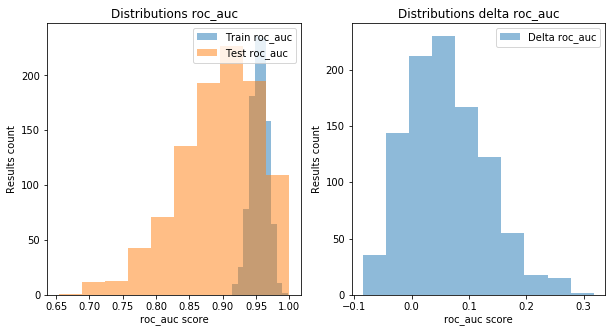

In [8]:
volatility.plot()

This is a parent class, which provides a lot of flexibility in making experiment. The functionality of this class is very wide, please refer to the API reference for details. 

In order to simplify use of the methodology, two convenience classes have been created:

### SplitSeedVolatility 

Estimates volatility of metrics based on splitting the data into train and test sets multiple times randomly, each time with different train/test splits at each iteration. It does not apply any subsampling to the data.

In [9]:
volatility = SplitSeedVolatility(clf, iterations=500 , test_prc = 0.5)
volatility.fit_compute(X, y)

,train_mean,train_std,test_mean,test_std,delta_mean,delta_std
roc_auc,0.965341,0.016222,0.884667,0.044371,0.080674,0.05483


### BootstrappedVolatility

Estimates volatility of metrics based on splitting the data into train and test with static seed, and bootstrapping train and test set.

In [10]:
volatility = BootstrappedVolatility(clf, metrics=['accuracy', 'roc_auc'])
volatility.fit_compute(X, y)

,train_mean,train_std,test_mean,test_std,delta_mean,delta_std
accuracy,0.896987,0.034669,0.785560,0.096122,0.111427,0.100191
roc_auc,0.968687,0.015170,0.879631,0.082417,0.089056,0.083796
